### Taller en casa

El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.

Las variables registradas son las siguientes:

* `age` - edad
* `job`- tipo de trabajo
* `marital` - estado civil
* `education` - nivel educativo
* `default` - crédito en incumplimiento
* `housing` - crédito de vivienda
* `loan` - préstamos personal
* `contact` - tipo de contacto realizado
* `month` - mes en que se hizo el último contacto
* `day_of_week` - último día de contacto de la semana
* `duration` - duración del último contacto, en segundos
* `campaign` - número de contactos realizados durante esta campaña y para este cliente
* `pdays` - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
* `previous`- número de contactos realizados antes de esta campaña y para este cliente
* `poutcome` - resultado de la campaña de marketing anterior
* `emp.var.rate`- tasa de variación del empleo - indicador trimestral
* `cons.price.idx` - índice de precios al consumidor - indicador mensual
* `cons.conf.idx` - índice de confianza del consumidor - indicador mensual
* `euribor3m` - euribor tasa de 3 meses - indicador diario
* `nr.employed` - número de empleados
* `y` - ¿el cliente ha suscrito un depósito a plazo?

Los datos fueron tomados de:
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

<H5> las librerias necesarias </H5>

In [1]:
library("readr")#leer la base de datos
library("ggplot2")#para graficar 
library("dplyr")#usar select

Warning message:
"package 'readr' was built under R version 4.0.2"


In [2]:
# Importamos los datos:
datos<-read.csv2('bank-additional-full.csv', sep=";", dec=".")
head(datos)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
conti<- select(datos,año=age,nivel=duration,dias=pdays,contactos=campaign,tasa=emp.var.rate,indiceP=cons.price.idx,
               indiceC=cons.conf.idx,euribor=euribor3m, Ne=nr.employed)
head(conti)

,año,nivel,dias,contactos,tasa,indiceP,indiceC,euribor,Ne
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,261,999,1,1.1,93.994,-36.4,4.857,5191
2,57,149,999,1,1.1,93.994,-36.4,4.857,5191
3,37,226,999,1,1.1,93.994,-36.4,4.857,5191
4,40,151,999,1,1.1,93.994,-36.4,4.857,5191
5,56,307,999,1,1.1,93.994,-36.4,4.857,5191
6,45,198,999,1,1.1,93.994,-36.4,4.857,5191


In [5]:
cor(conti)

,año,nivel,dias,contactos,tasa,indiceP,indiceC,euribor,Ne
año,1.0000000000,-0.000865705,-0.03436895,0.00459358,-0.0003706855,0.000856715,0.129371614,0.01076743,-0.01772513
nivel,-0.0008657050,1.000000000,-0.04757702,-0.07169923,-0.0279678845,0.005312268,-0.008172873,-0.03289666,-0.04470322
dias,-0.0343689512,-0.047577015,1.00000000,0.05258357,0.2710041743,0.078889109,-0.091342354,0.29689911,0.37260474
contactos,0.0045935805,-0.071699226,0.05258357,1.00000000,0.1507538056,0.127835912,-0.013733099,0.13513251,0.14409489
tasa,-0.0003706855,-0.027967884,0.27100417,0.15075381,1.0000000000,0.775334171,0.196041268,0.97224467,0.90697010
indiceP,0.0008567150,0.005312268,0.07888911,0.12783591,0.7753341708,1.000000000,0.058986182,0.68823011,0.52203398
indiceC,0.1293716142,-0.008172873,-0.09134235,-0.01373310,0.1960412681,0.058986182,1.000000000,0.27768622,0.10051343
euribor,0.0107674295,-0.032896656,0.29689911,0.13513251,0.9722446712,0.688230107,0.277686220,1.00000000,0.94515443
Ne,-0.0177251319,-0.044703223,0.37260474,0.14409489,0.9069701013,0.522033977,0.100513432,0.94515443,1.00000000


In [6]:
summary(conti)


      año            nivel             dias         contactos     
 Min.   :17.00   Min.   :   0.0   Min.   :  0.0   Min.   : 1.000  
 1st Qu.:32.00   1st Qu.: 102.0   1st Qu.:999.0   1st Qu.: 1.000  
 Median :38.00   Median : 180.0   Median :999.0   Median : 2.000  
 Mean   :40.02   Mean   : 258.3   Mean   :962.5   Mean   : 2.568  
 3rd Qu.:47.00   3rd Qu.: 319.0   3rd Qu.:999.0   3rd Qu.: 3.000  
 Max.   :98.00   Max.   :4918.0   Max.   :999.0   Max.   :56.000  
      tasa             indiceP         indiceC         euribor     
 Min.   :-3.40000   Min.   :92.20   Min.   :-50.8   Min.   :0.634  
 1st Qu.:-1.80000   1st Qu.:93.08   1st Qu.:-42.7   1st Qu.:1.344  
 Median : 1.10000   Median :93.75   Median :-41.8   Median :4.857  
 Mean   : 0.08189   Mean   :93.58   Mean   :-40.5   Mean   :3.621  
 3rd Qu.: 1.40000   3rd Qu.:93.99   3rd Qu.:-36.4   3rd Qu.:4.961  
 Max.   : 1.40000   Max.   :94.77   Max.   :-26.9   Max.   :5.045  
       Ne      
 Min.   :4964  
 1st Qu.:5099  
 Median

In [ ]:
pairs(conti)

<H1>Generacion del modelo lineal </H1>

<H4>1. Modelo lineal multiple </H4>

Vamos a generar el modelo con todos los predictores de "Conti", tomando como variable independiente de nuestro modelo a tasa de variacion de empleo ("tasa").

In [56]:
modeloMultiple <- lm(tasa ~ . , data = conti)
summary(modeloMultiple)


Call:
lm(formula = tasa ~ ., data = conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31528 -0.13576 -0.02173  0.15430  0.79916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.057e+01  9.119e-01 -77.387  < 2e-16 ***
año         -4.276e-04  1.305e-04  -3.278  0.00105 ** 
nivel       -1.454e-06  5.219e-06  -0.279  0.78049    
dias        -5.233e-05  7.933e-06  -6.596 4.28e-11 ***
contactos    4.906e-03  4.950e-04   9.911  < 2e-16 ***
indiceP      5.942e-01  5.070e-03 117.191  < 2e-16 ***
indiceC     -1.013e-02  4.699e-04 -21.562  < 2e-16 ***
euribor      6.585e-01  5.319e-03 123.804  < 2e-16 ***
Ne           2.382e-03  1.036e-04  22.981  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2734 on 41179 degrees of freedom
Multiple R-squared:  0.9697,	Adjusted R-squared:  0.9697 
F-statistic: 1.648e+05 on 8 and 41179 DF,  p-value: < 2.2e-16


Podemos decir que el modelo es capaz de explicar un 96,97 % de la varianza y que el p-value es significativo (2.2*10^-16), por lo que podemos decir que el modelo es útil y que existe una relación entre los predictores y la variable respuesta (al menos uno de los coeficientes es distinto a 0)

ahora seleccionaremos el predictor del modelo con la funcionstep():

In [57]:
step(modeloMultiple, direction = "both", trace = 1)

Start:  AIC=-106817.7
tasa ~ año + nivel + dias + contactos + indiceP + indiceC + euribor + 
    Ne

            Df Sum of Sq    RSS     AIC
- nivel      1      0.01 3078.0 -106820
<none>                   3078.0 -106818
- año        1      0.80 3078.8 -106809
- dias       1      3.25 3081.3 -106776
- contactos  1      7.34 3085.4 -106722
- indiceC    1     34.75 3112.8 -106357
- Ne         1     39.48 3117.5 -106295
- indiceP    1   1026.56 4104.6  -94965
- euribor    1   1145.70 4223.7  -93787

Step:  AIC=-106819.6
tasa ~ año + dias + contactos + indiceP + indiceC + euribor + 
    Ne

            Df Sum of Sq    RSS     AIC
<none>                   3078.0 -106820
+ nivel      1      0.01 3078.0 -106818
- año        1      0.80 3078.8 -106811
- dias       1      3.25 3081.3 -106778
- contactos  1      7.40 3085.4 -106723
- indiceC    1     34.75 3112.8 -106359
- Ne         1     39.51 3117.6 -106296
- indiceP    1   1026.59 4104.6  -94967
- euribor    1   1145.79 4223.8  -93788



Call:
lm(formula = tasa ~ año + dias + contactos + indiceP + indiceC + 
    euribor + Ne, data = conti)

Coefficients:
(Intercept)          año         dias    contactos      indiceP      indiceC  
 -7.057e+01   -4.276e-04   -5.226e-05    4.915e-03    5.942e-01   -1.013e-02  
    euribor           Ne  
  6.585e-01    2.382e-03  


Podemos notar que la variable con mayor p-value ha sido excluida del modelo, porque no ayudaba en gran medida en la variabilidad de "y"

In [39]:
modeloMultiplestep <- update(modeloMultiple, formula = ~ . -nivel)
summary(modeloMultiplestep )


Call:
lm(formula = tasa ~ año + dias + contactos + indiceP + indiceC + 
    euribor + Ne, data = conti)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3149 -0.1358 -0.0217  0.1544  0.7991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.057e+01  9.118e-01 -77.393  < 2e-16 ***
año         -4.276e-04  1.305e-04  -3.278  0.00105 ** 
dias        -5.226e-05  7.930e-06  -6.591 4.43e-11 ***
contactos    4.915e-03  4.938e-04   9.953  < 2e-16 ***
indiceP      5.942e-01  5.070e-03 117.194  < 2e-16 ***
indiceC     -1.013e-02  4.699e-04 -21.560  < 2e-16 ***
euribor      6.585e-01  5.318e-03 123.811  < 2e-16 ***
Ne           2.382e-03  1.036e-04  22.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2734 on 41180 degrees of freedom
Multiple R-squared:  0.9697,	Adjusted R-squared:  0.9697 
F-statistic: 1.884e+05 on 7 and 41180 DF,  p-value: < 2.2e-16


In [40]:
confint(modeloMultiplestep)

,2.5 %,97.5 %
(Intercept),-7.235721e+01,-6.878276e+01
año,-6.832619e-04,-1.718828e-04
dias,-6.780317e-05,-3.671908e-05
contactos,3.947015e-03,5.882817e-03
indiceP,5.842581e-01,6.041335e-01
indiceC,-1.105158e-02,-9.209658e-03
euribor,6.480486e-01,6.688968e-01
Ne,2.179226e-03,2.585425e-03


veamos como se comporta el modelo

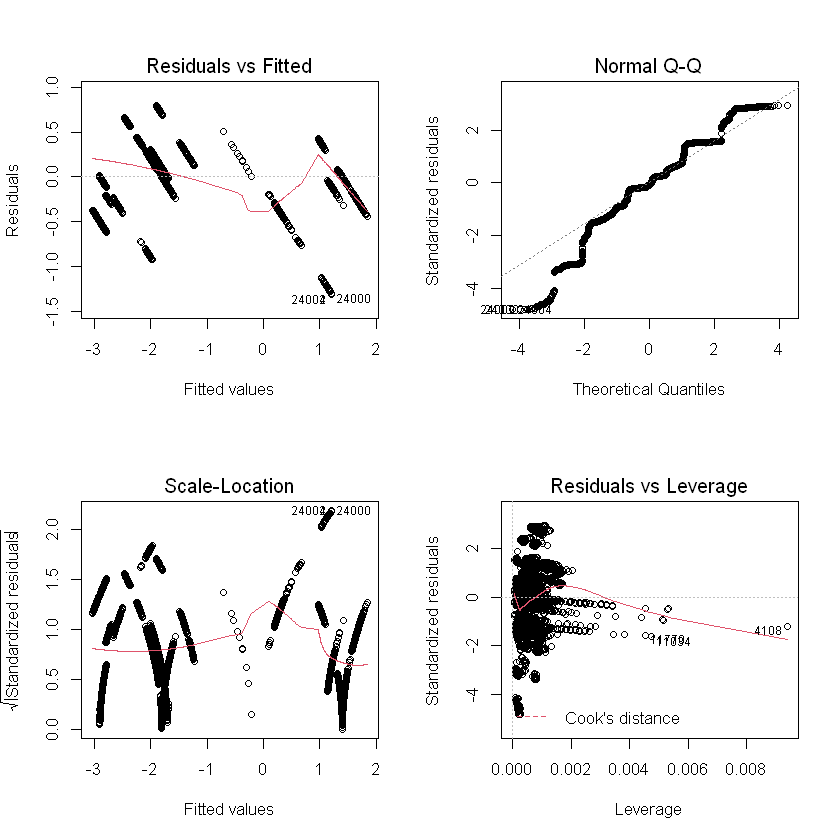

In [42]:
par(mfrow=c(2,2))
plot(modeloMultiplestep)

<H4>2. Modelo lineal simple </H4>

<H6>para indice de precio y tasa de empleo </H6>

In [7]:
varsel<-conti[,c(5,6)]
summary(varsel)

      tasa             indiceP     
 Min.   :-3.40000   Min.   :92.20  
 1st Qu.:-1.80000   1st Qu.:93.08  
 Median : 1.10000   Median :93.75  
 Mean   : 0.08189   Mean   :93.58  
 3rd Qu.: 1.40000   3rd Qu.:93.99  
 Max.   : 1.40000   Max.   :94.77  

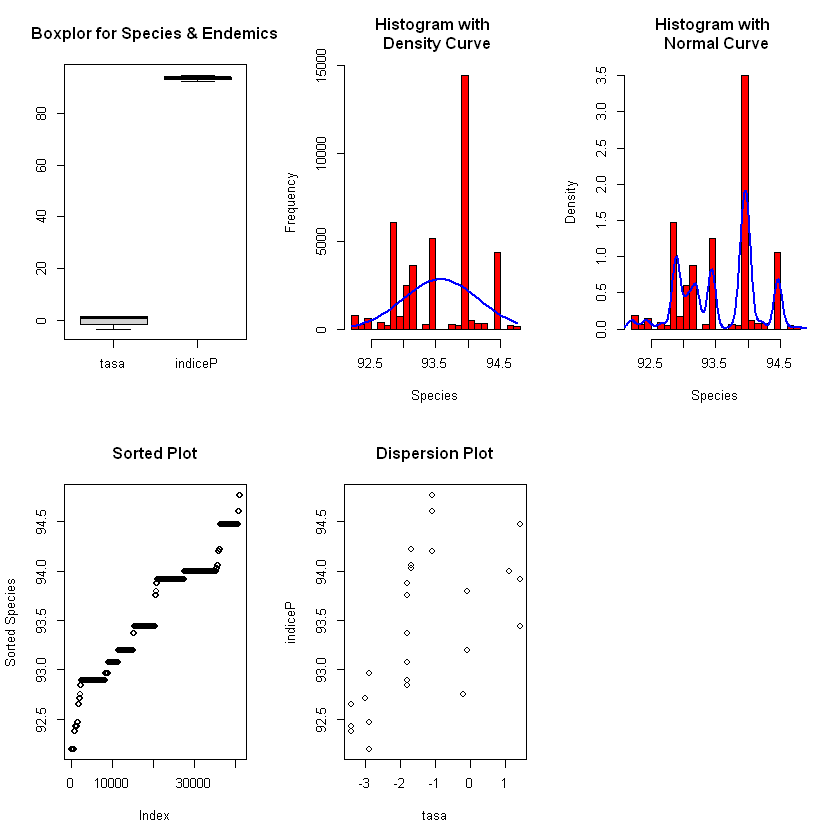

In [8]:
# Algunos gráficos exploratorios
par(mfrow=c(2,3))
x <- varsel$indiceP
boxplot(varsel, main="Boxplor for Species & Endemics")
h<-hist(x, breaks=25, col="red", xlab="Species", main="Histogram with \n Density Curve")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
h<-hist(x, freq = F, breaks=25, col="red", xlab="Species", main="Histogram with \n Normal Curve")
lines(density(x), col="blue", lwd=2)
plot(sort(x),ylab="Sorted Species", main = "Sorted Plot")
with(conti, plot(tasa,indiceP, main = "Dispersion Plot"))
par(mfrow=c(1,1))

generamos el modelo lineal por regresion simple:

In [9]:
regresion <- lm(indiceP ~ tasa, data = conti)
summary(regresion)


Call:
lm(formula = indiceP ~ tasa, data = conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73913 -0.19504 -0.03423  0.12748  1.52898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.552271   0.001804 51865.4   <2e-16 ***
tasa         0.285682   0.001147   249.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3656 on 41186 degrees of freedom
Multiple R-squared:  0.6011,	Adjusted R-squared:  0.6011 
F-statistic: 6.207e+04 on 1 and 41186 DF,  p-value: < 2.2e-16


Los parámetros de la ecuación de la recta de mínimos cuadrados que relaciona el indice de precios al consumidor en función de la tasa de variacion de empleo vienen dados por la columna ´Estimate´ de la tabla ´Coefficients´ de la salida anterior. Por lo tanto, en este ejemplo la ecuación de la recta de mínimos cuadrados es:

<p style='text-align: center;'>$y=93.552271 +0.285682x$</p>

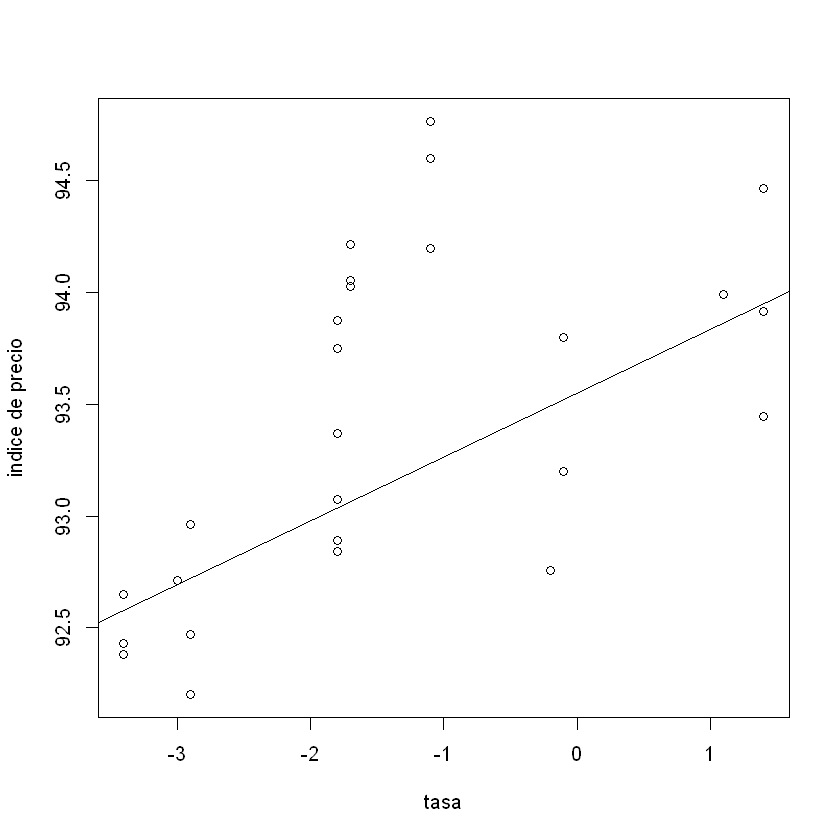

In [10]:
plot(conti$tasa, conti$indiceP, xlab='tasa', ylab='indice de precio')
abline(regresion)

In [11]:
indiceTasa <- data.frame(tasa= seq(-3, 1))
predict(regresion, indiceTasa)

1        2        3        4        5 
92.69523 92.98091 93.26659 93.55227 93.83795

Los intervalos de confianza para los parámetros los obtendremos con el comando confint. El parámetro level permite elegir el nivel de confianza (por defecto es 0.95)

In [12]:
confint(regresion)

,2.5 %,97.5 %
(Intercept),93.5487358,93.5558066
tasa,0.2834343,0.2879292


In [13]:
confint(regresion, level = 0.90)

,5 %,95 %
(Intercept),93.5493042,93.5552381
tasa,0.2837956,0.2875678


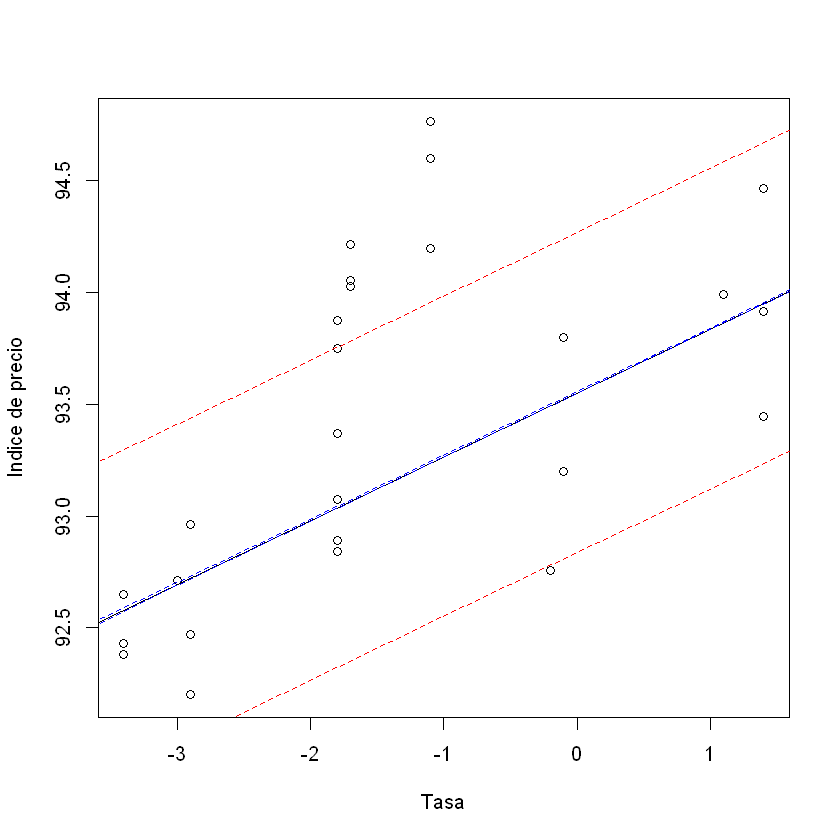

In [14]:
indiceTasa <- data.frame(tasa = seq(-4, 2))
# Grafico de dispersion y recta
plot(conti$tasa, conti$indiceP, xlab='Tasa', ylab='Indice de precio')
abline(regresion)

# Intervalos de confianza de la respuesta media:
# ic es una matriz con tres columnas: la primera es la prediccion, las otras dos son los extremos del intervalo
ic <- predict(regresion, indiceTasa, interval = 'confidence',se.regresion=T)
lines(indiceTasa$tasa, ic[, 2], lty = 2, col='blue')
lines(indiceTasa$tasa, ic[, 3], lty = 2,col='blue')

# Intervalos de prediccion
ic <- predict(regresion, indiceTasa, interval = 'prediction')
lines(indiceTasa$tasa, ic[, 2], lty = 2, col = 'red')
lines(indiceTasa$tasa, ic[, 3], lty = 2, col = 'red')

In [15]:
anova(regresion)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
tasa,1,8295.740,8295.7403874,62074.09,0
Residuals,41186,5504.203,0.1336426,NA,NA


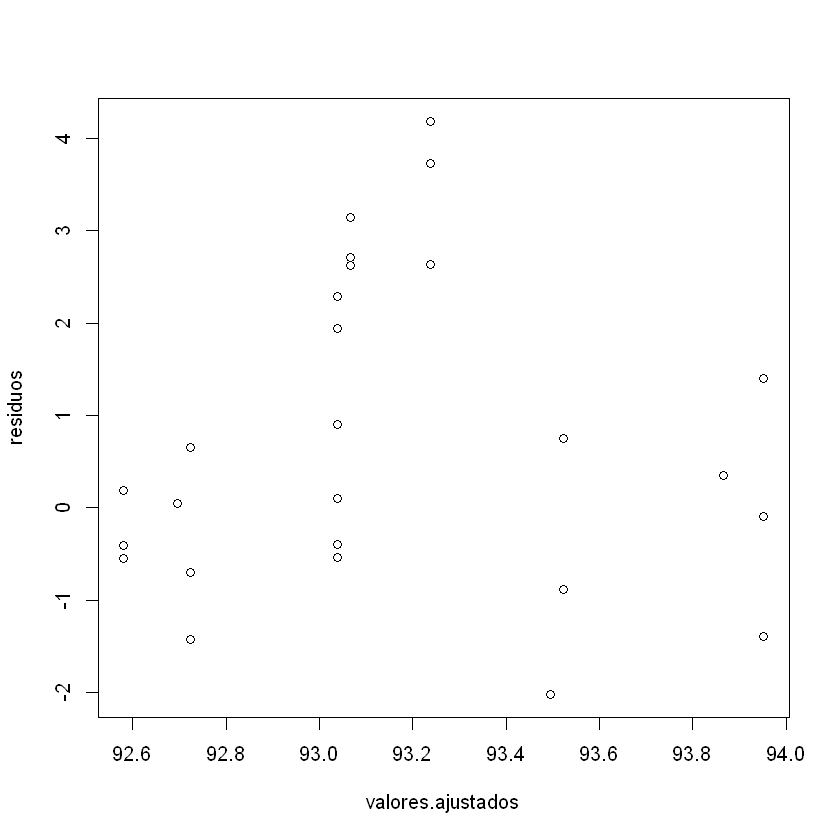

In [16]:
residuos <- rstandard(regresion)
valores.ajustados <- fitted(regresion)
plot(valores.ajustados, residuos)

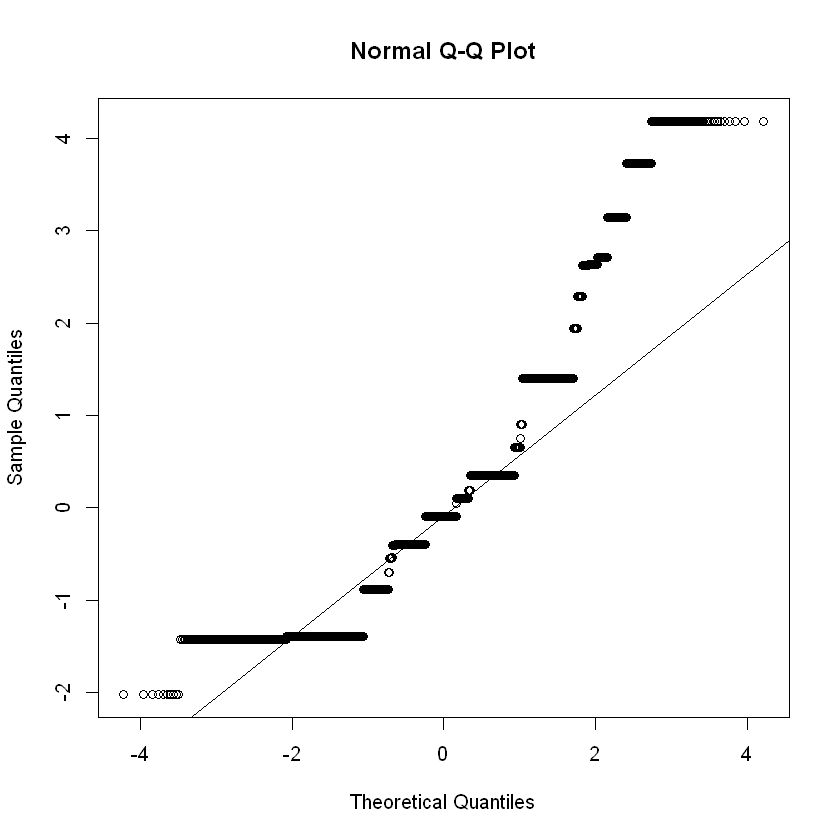

In [17]:
qqnorm(residuos)
qqline(residuos)

Lo grafique por segunda vez de segunda forma para verificar, este es con la libreria ("ggplot2")

Warning message in predict.lm(regresion, interval = "prediction"):
"predictions on current data refer to _future_ responses
"
`geom_smooth()` using formula 'y ~ x'



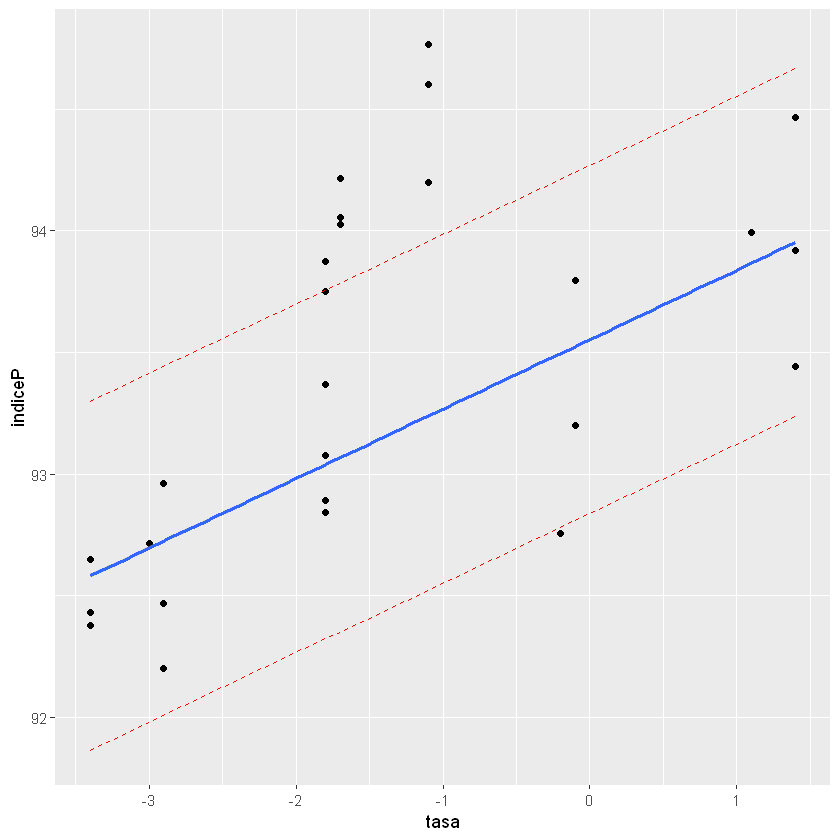

In [22]:

# 1. Add predictions 
pred.int <- predict(regresion, interval = "prediction")
mydata <- cbind(conti, pred.int)
# 2. Regression line + confidence intervals

p <- ggplot(mydata, aes(tasa, indiceP)) +
  geom_point() +
  stat_smooth(method = lm)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")

<H6> tasa de variacion de empleo y euribor </H6>

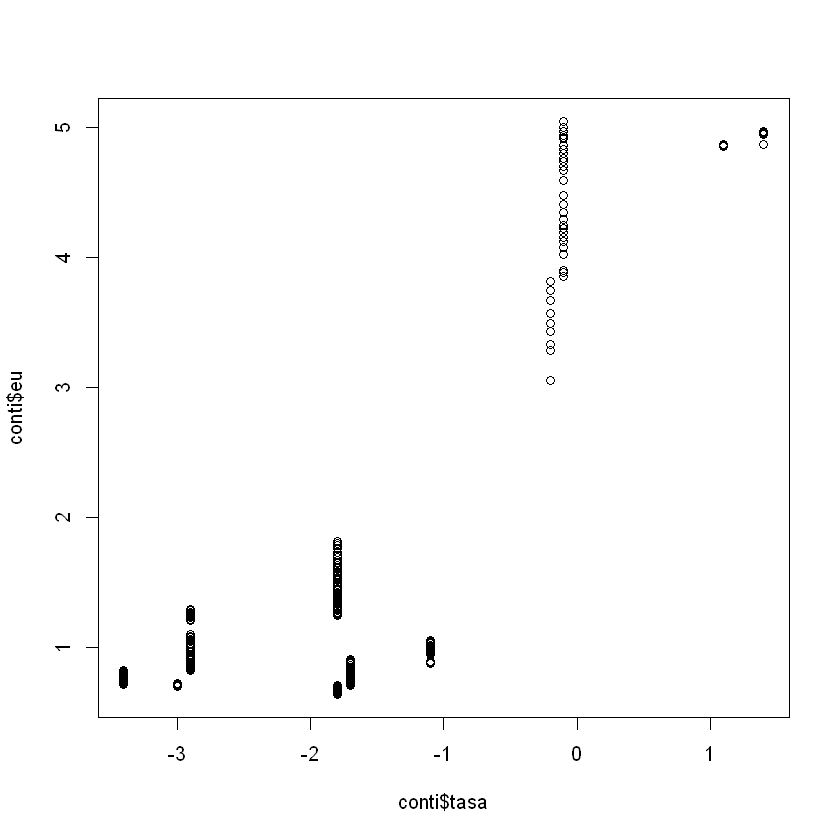

In [23]:
plot(conti$tasa,conti$eu)

In [27]:
modelo <- lm(euribor ~ tasa, data=conti)
summary(modelo)


Call:
lm(formula = euribor ~ tasa, data = conti)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47663 -0.17219 -0.07319  0.14284  1.61895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.533393   0.002002  1764.7   <2e-16 ***
tasa        1.073425   0.001273   843.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4058 on 41186 degrees of freedom
Multiple R-squared:  0.9453,	Adjusted R-squared:  0.9453 
F-statistic: 7.112e+05 on 1 and 41186 DF,  p-value: < 2.2e-16


In [28]:
cor.test(conti$euribor,conti$tasa, method = "pearson")


	Pearson's product-moment correlation

data:  conti$euribor and conti$tasa
t = 843.33, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9717110 0.9727684
sample estimates:
      cor 
0.9722447 


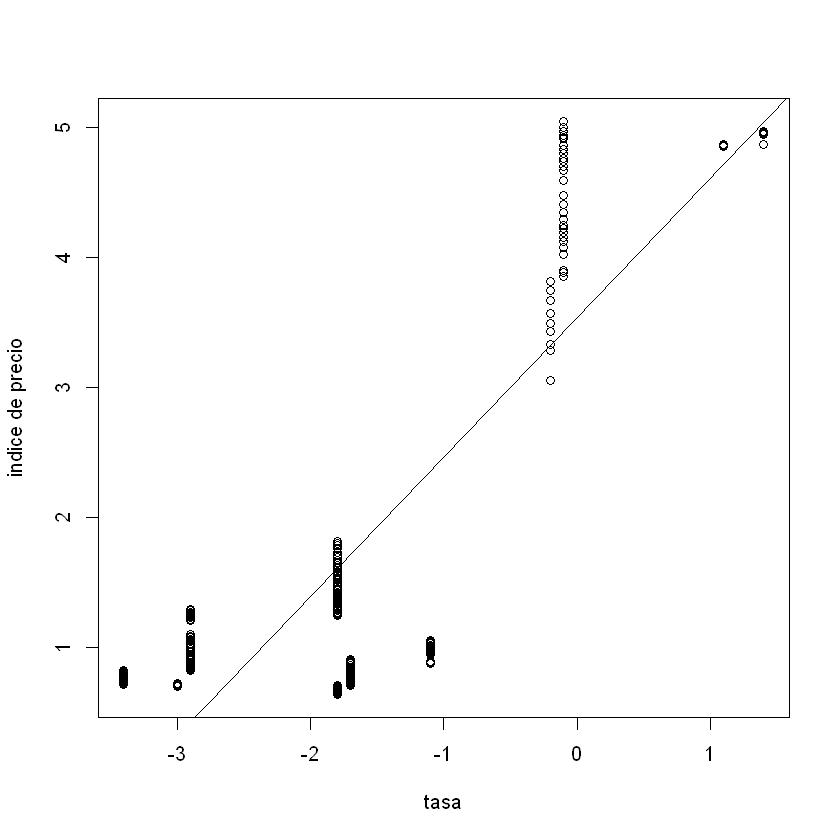

In [29]:
plot(conti$tasa, conti$euribor, xlab='tasa', ylab='indice de precio')
abline(modelo)

In [30]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),3.529468,3.537317
tasa,1.070930,1.075920


In [31]:
confint(modelo, level = 0.90)

,5 %,95 %
(Intercept),3.530099,3.536686
tasa,1.071331,1.075519


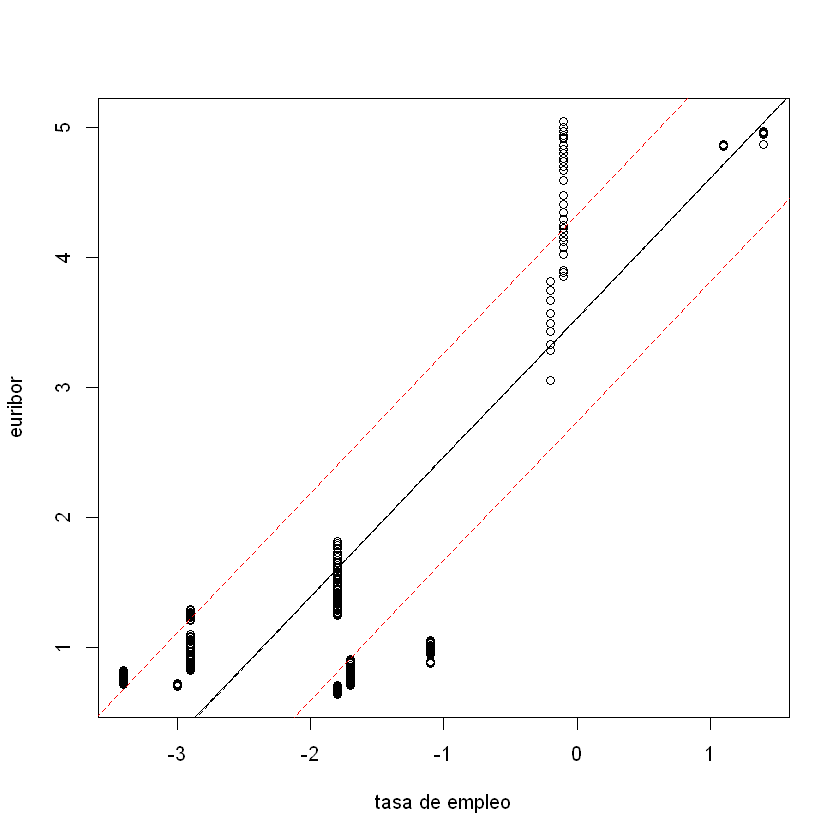

In [32]:
nuevasTasa <- data.frame(tasa = seq(-5, 3))
# Grafico de dispersion y recta
plot(conti$tasa, conti$euribor ,xlab = "tasa de empleo", ylab = "euribor" )
abline(modelo)

# Intervalos de confianza de la respuesta media:
# ic es una matriz con tres columnas: la primera es la prediccion, las otras dos son los extremos del intervalo
ic <- predict(modelo, nuevasTasa, interval = 'confidence')
lines(nuevasTasa$tasa, ic[, 2], lty = 2)
lines(nuevasTasa$tasa, ic[, 3], lty = 2)

# Intervalos de prediccion
ic <- predict(modelo, nuevasTasa, interval = 'prediction')
lines(nuevasTasa$tasa, ic[, 2], lty = 2, col = 'red')
lines(nuevasTasa$tasa, ic[, 3], lty = 2, col = 'red')

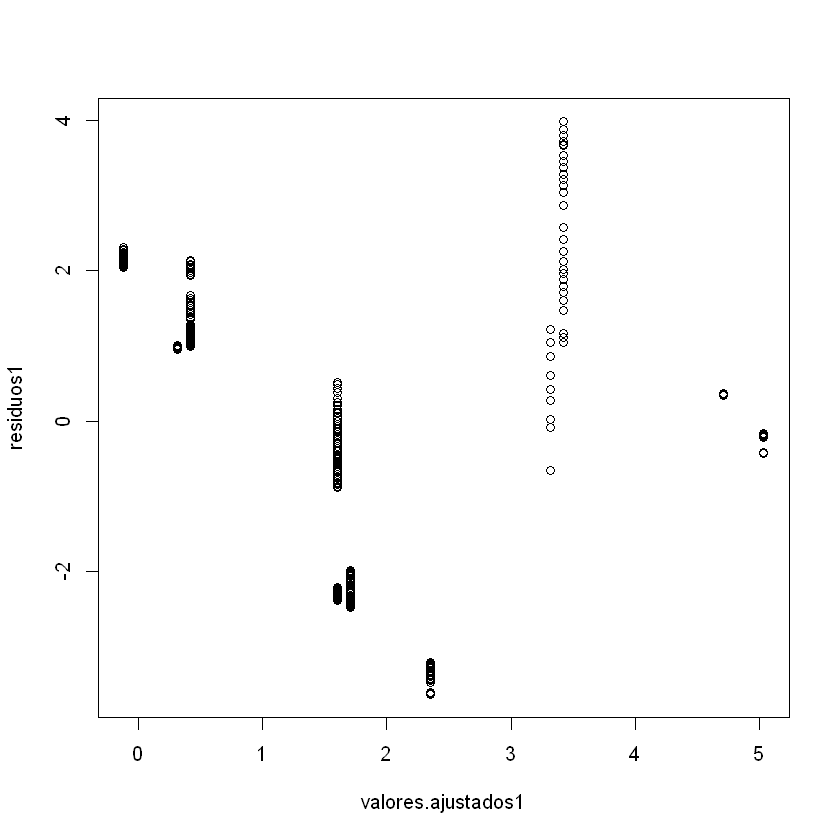

In [35]:
residuos1 <- rstandard(modelo)
valores.ajustados1 <- fitted(modelo)
plot(valores.ajustados1, residuos1)

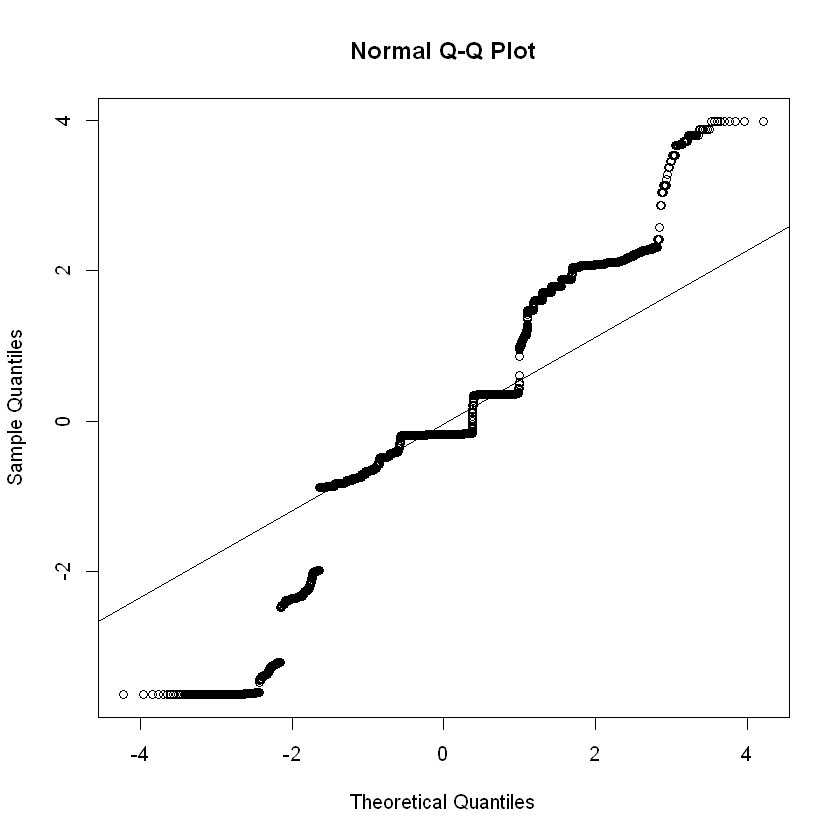

In [36]:
qqnorm(residuos1)
qqline(residuos1)